In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import metrics
import matplotlib
from matplotlib import pyplot as plt

pd.options.display.max_columns = 100

In [18]:
data = pd.read_table("covtype.data.gz",compression='gzip',sep=",",header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [19]:
data.shape

(581012, 55)

Dane wyglądają bardzo przyzwoicie. Mamy 10 cech liczbowych, reszta to cechy binarne, zareprezentowane już od razu jako dummy variables, więc w zasadzie nadają się by wpuszczać je od razu do klasyfikatora.

Sprawdzam najpierw, czy mamy jakieś brakujące dane.

In [20]:
data.isnull().any(axis=1).value_counts()

False    581012
dtype: int64

Czyli wszystkie dane są. Doskonale.

Przetasowuję zbiór, żeby dzielił się losowo.

Wezmę tylko fragment danych, bo mój komputer temu nie podoła. 
Gdybym robił to na serio i miał dużo czasu, to użyłbym całego zbioru (lub przynajmniej znacznie większej próbki).

In [21]:
shuffle = data.sample(frac=1)
shuffle = shuffle.iloc[:6000,:]

In [22]:
X = shuffle.iloc[:,0:54]
Y = shuffle.iloc[:,54]

Zrobię najpierw prostą próbę naiwnym Bayesem.

Używam walidacji krzyżowej do oceny trafności klasyfikacji, z pięcioma foldami.

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
gnb = GaussianNB()
cv_scores = cross_validation.cross_val_score(gnb, X, Y, cv=5)
print("Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.44 (+/- 0.03)


Nie jest to najlepszy wynik, ale może troszkę uda się go poprawić.

***

Skaluję dane, żeby przygotować dane np. do użycia SVMa.

In [25]:
X = preprocessing.scale(X)

In [26]:
X = pd.DataFrame(X)

In [13]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,0.524468,0.777368,0.528357,-0.851528,-0.630144,-0.332126,-1.079529,1.453557,1.586088,-1.208350,-0.896643,-0.234997,1.115271,-0.244328,-0.075491,-0.113266,-0.081923,-0.152862,-0.056362,-0.101346,-0.01826,-0.01826,-0.038759,-0.234206,-0.161220,-0.225362,-0.189975,-0.031639,0.0,-0.068473,-0.074367,-0.053305,-0.08396,-0.130849,-0.031639,-0.252272,-0.332097,-0.199653,-0.034176,-0.056362,-0.044766,-0.02888,-0.501302,-0.230621,-0.205890,3.160540,-0.288493,-0.048361,-0.056362,-0.025828,-0.025828,-0.181328,-0.14646,-0.115509
1,1.755630,1.201680,-1.493245,3.216521,1.077729,-0.550834,-0.062787,0.786392,0.620073,-0.281945,-0.896643,-0.234997,1.115271,-0.244328,-0.075491,-0.113266,-0.081923,-0.152862,-0.056362,-0.101346,-0.01826,-0.01826,-0.038759,-0.234206,-0.161220,-0.225362,-0.189975,-0.031639,0.0,-0.068473,-0.074367,-0.053305,-0.08396,-0.130849,-0.031639,-0.252272,-0.332097,-0.199653,-0.034176,-0.056362,-0.044766,-0.02888,-0.501302,-0.230621,-0.205890,-0.316402,-0.288493,-0.048361,-0.056362,-0.025828,-0.025828,-0.181328,-0.14646,8.657330
2,1.541987,1.075289,-0.549831,3.013591,2.733322,-0.839863,-0.740615,0.991673,1.220569,-1.076895,-0.896643,4.255383,-0.896643,-0.244328,-0.075491,-0.113266,-0.081923,-0.152862,-0.056362,-0.101346,-0.01826,-0.01826,-0.038759,-0.234206,-0.161220,-0.225362,-0.189975,-0.031639,0.0,-0.068473,-0.074367,-0.053305,-0.08396,-0.130849,-0.031639,-0.252272,-0.332097,-0.199653,-0.034176,-0.056362,-0.044766,-0.02888,-0.501302,-0.230621,4.856971,-0.316402,-0.288493,-0.048361,-0.056362,-0.025828,-0.025828,-0.181328,-0.14646,-0.115509
3,-1.394696,-1.398363,-0.415057,-0.110596,-0.682426,0.143998,-0.364044,-0.240017,0.280662,0.548009,-0.896643,-0.234997,1.115271,-0.244328,-0.075491,-0.113266,-0.081923,-0.152862,-0.056362,-0.101346,-0.01826,-0.01826,-0.038759,-0.234206,6.202716,-0.225362,-0.189975,-0.031639,0.0,-0.068473,-0.074367,-0.053305,-0.08396,-0.130849,-0.031639,-0.252272,-0.332097,-0.199653,-0.034176,-0.056362,-0.044766,-0.02888,-0.501302,-0.230621,-0.205890,-0.316402,-0.288493,-0.048361,-0.056362,-0.025828,-0.025828,-0.181328,-0.14646,-0.115509
4,0.781564,1.328071,-0.819378,-0.035087,-0.281599,1.565918,-0.514672,0.683751,0.907266,0.407998,1.115271,-0.234997,-0.896643,-0.244328,-0.075491,-0.113266,-0.081923,-0.152862,-0.056362,-0.101346,-0.01826,-0.01826,-0.038759,-0.234206,-0.161220,-0.225362,-0.189975,-0.031639,0.0,-0.068473,-0.074367,-0.053305,-0.08396,-0.130849,-0.031639,-0.252272,-0.332097,-0.199653,-0.034176,-0.056362,-0.044766,-0.02888,1.994807,-0.230621,-0.205890,-0.316402,-0.288493,-0.048361,-0.056362,-0.025828,-0.025828,-0.181328,-0.14646,-0.115509


Niektóre mają zerową wariancję, więc od razu je usuwam.

*Uwaga: to zależy od tego, jaki fragment danych wylosowałem.*

In [29]:
X[20].var()

1.0001666944490752

In [30]:
X[28].var()

0.0

In [31]:
for column in X:
    if X[column].var() == 0: 
        X = X.drop(column, axis=1)

In [32]:
X.shape

(6000, 53)

Mamy 52 (*około - zależy jak się wylosowało powyżej*) cechy, nie jest to bardzo dużo. Spróbuję jednak sprawdzić, czy nie mamy cech redundantnych i zmniejszyć wymiar danych.

Rysuję najpierw histogramy cech, żeby rzucić okiem jak wygląda sprawa.

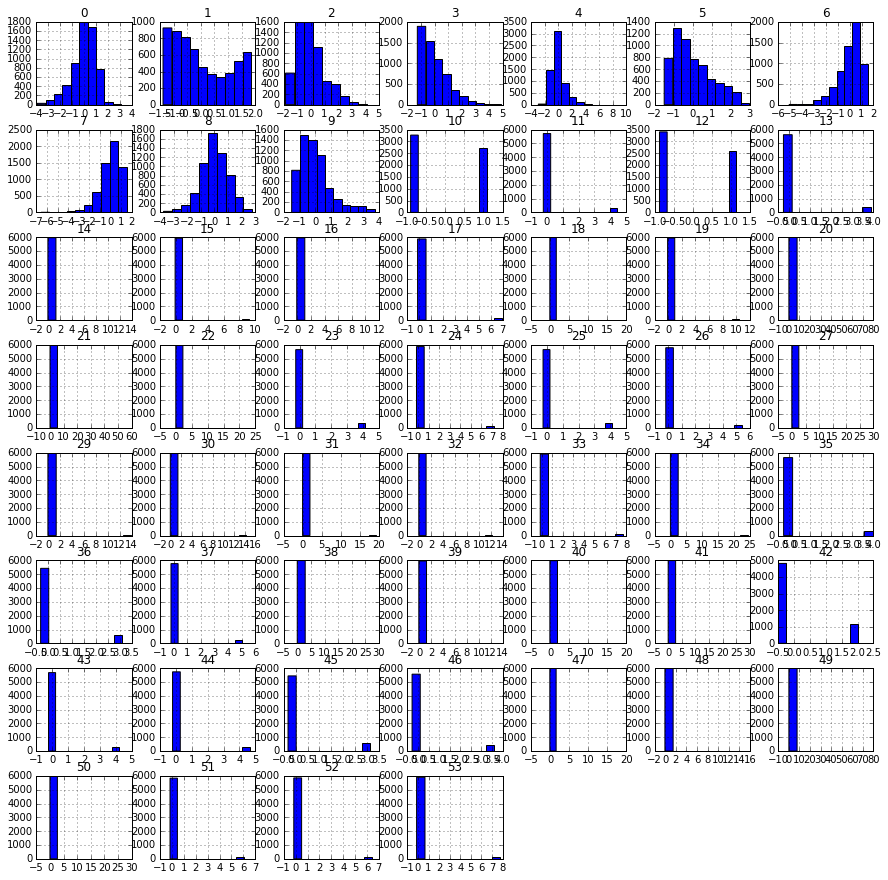

In [33]:
X.hist(figsize=(15,15));

Od razu widać, że wiele cech jest bardzo słabo zróżnicowanych i prawdopodobnie nie będą wnosiły wiele do klasyfikacji.

In [34]:
correlation = X.corr().abs()

In [35]:
s = correlation.unstack()
so = s.sort_values(ascending=False)
[i for i in so if i < 1]

[0.79981765918973091,
 0.79981765918973091,
 0.78509273193917661,
 0.78509273193917661,
 0.64130935073217699,
 0.64130935073217699,
 0.61942785268284228,
 0.61942785268284228,
 0.61570998845993052,
 0.61570998845993052,
 0.59306217628150082,
 0.59306217628150082,
 0.57838328486501889,
 0.57838328486501889,
 0.54021654035723454,
 0.54021654035723454,
 0.52106552532169614,
 0.52106552532169614,
 0.5151859299014997,
 0.5151859299014997,
 0.45418571090418997,
 0.45418571090418997,
 0.44427970031337488,
 0.44427970031337488,
 0.43207472876414504,
 0.43207472876414504,
 0.38189778033149552,
 0.38189778033149552,
 0.3755571551894698,
 0.3755571551894698,
 0.37252124419411725,
 0.37252124419411725,
 0.33234196370763053,
 0.33234196370763053,
 0.3317297426823948,
 0.3317297426823948,
 0.32168987710902885,
 0.32168987710902885,
 0.31418613413235519,
 0.31418613413235519,
 0.30126247372444259,
 0.30126247372444259,
 0.29297394272348704,
 0.29297394272348704,
 0.29246978051946532,
 0.2924697805194

Z macierzy korelacji widać, że mamy sporo wysoko skorelowanych cech.

Skorzystam jeszcze z metody Extra-Trees, która powinna nam pokazać, które cechy mają największy wpływ na rozkład klas w danych.

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
forest = ExtraTreesClassifier()
forest = forest.fit(X, Y)

["{0:0.2f}".format(i) for i in forest.feature_importances_]

['0.17',
 '0.06',
 '0.06',
 '0.06',
 '0.06',
 '0.08',
 '0.06',
 '0.06',
 '0.06',
 '0.08',
 '0.01',
 '0.01',
 '0.01',
 '0.05',
 '0.00',
 '0.01',
 '0.00',
 '0.01',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.01',
 '0.01',
 '0.01',
 '0.01',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.02',
 '0.01',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.01',
 '0.02',
 '0.01']

Jak widać można wyodrębnić niewielką liczbę cech które będą wyjaśniały prawie całą zmienność.

Spróbuję zatem użyć algorytmu PCA żeby jak najbardziej zredukować wymiar przestrzeni wejściowej.

In [38]:
from sklearn.decomposition import PCA

In [39]:
for n in range(2,50):
    pca = PCA(n_components=n)
    pca.fit(X)
    print("Liczba wymiarów zredukowanej przestrzeni: ", n)
#     print("Wariancja wyjaśniona przez wybrane cechy: ", pca.explained_variance_ratio_)
    print("W sumie wariancja: ", sum(pca.explained_variance_ratio_))

Liczba wymiarów zredukowanej przestrzeni:  2
W sumie wariancja:  0.125129332994
Liczba wymiarów zredukowanej przestrzeni:  3
W sumie wariancja:  0.171670371098
Liczba wymiarów zredukowanej przestrzeni:  4
W sumie wariancja:  0.208884669309
Liczba wymiarów zredukowanej przestrzeni:  5
W sumie wariancja:  0.237415695961
Liczba wymiarów zredukowanej przestrzeni:  6
W sumie wariancja:  0.265149466872
Liczba wymiarów zredukowanej przestrzeni:  7
W sumie wariancja:  0.288623037759
Liczba wymiarów zredukowanej przestrzeni:  8
W sumie wariancja:  0.310769485566
Liczba wymiarów zredukowanej przestrzeni:  9
W sumie wariancja:  0.33173764016
Liczba wymiarów zredukowanej przestrzeni:  10
W sumie wariancja:  0.352335782307
Liczba wymiarów zredukowanej przestrzeni:  11
W sumie wariancja:  0.372571566914
Liczba wymiarów zredukowanej przestrzeni:  12
W sumie wariancja:  0.392760067141
Liczba wymiarów zredukowanej przestrzeni:  13
W sumie wariancja:  0.412618533043
Liczba wymiarów zredukowanej przestrz

Powiedzmy że około 95% wyjaśnionej wariancji powinno nam wystarczyć. Spróbujemy zatem zredukować przestrzeń do 40 wymiarów przy pomocy PCA.

In [40]:
pca = PCA(n_components=40)
X_reduced = pca.fit_transform(X)

***

Próbuję jeszcze raz Bayesa.

In [41]:
gnb = GaussianNB()
cv_scores = cross_validation.cross_val_score(gnb, X_reduced, Y, cv=5)
print("Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.41 (+/- 0.03)


Myślę że uda nam się jeszcze to podciągnąć.

Spróbuję SVM z jądrem RBF.

In [42]:
from sklearn.svm import SVC

In [43]:
clf = SVC(kernel='rbf')
cv_scores = cross_validation.cross_val_score(clf, X_reduced, Y, cv=5)
print("Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.71 (+/- 0.03)


Znacznie lepiej. Albo z jądrem liniowym:

In [44]:
clf = SVC(kernel='linear')
cv_scores = cross_validation.cross_val_score(clf, X_reduced, Y, cv=5)
print("Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.73 (+/- 0.03)


(W tym wypadku niewielka różnica.)

Mamy dość ładne liczbowe dane, spróbuję więc jeszcze logistycznej regresji.

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression()
cv_scores = cross_validation.cross_val_score(logreg, X, Y, cv=5)
print("Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.72 (+/- 0.03)


Podobny performance jak SVM, ale spróbuję ją zoptymalizować, może uda się troszkę poprawić.

Dodaję cechy kwadratowe.

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_reduced)

In [49]:
X_poly.shape

(6000, 861)

In [50]:
logreg = LogisticRegression()
cv_scores = cross_validation.cross_val_score(logreg, X, Y, cv=5)
print("Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.72 (+/- 0.03)


Dzielę na części do cross-walidacji.

In [53]:
X_train = X_poly[:2000,:]
Y_train = Y[:2000]

X_cv = X_poly[2000:4000,:]
Y_cv = Y[2000:4000]

X_test = X_poly[4000:,:]
Y_test = Y[4000:]

c = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5]
cv_scores = np.zeros(len(c))

Optymalizuję współczynnik regularyzacji.

*To się będzie mielić przez dłuższą chwilę.*

In [54]:
for i in range(len(c)):
    logreg = LogisticRegression(C=c[i])
    logreg.fit(X_train,Y_train)
    Y_pred = logreg.predict(X_cv)
    cv_scores[i] = pd.Series((list(Y_cv) == Y_pred)).value_counts(True)[True]

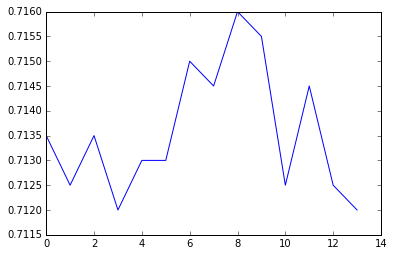

In [56]:
plt.plot(cv_scores)

In [58]:
c[8]

0.9

Można by przetestować to z większą rozdzielczością dla C i może też zrobić parę powtórzeń dla każdej wartości parametru. Wygląda jednak na to że tak czy inaczej różnica nie będzie wielka. Dla mojej próbki maksymalna trafność jest dla C=0.9 (czyli mniej więcej tyle samo, co domyślnie dla LR w scikicie).

In [59]:
logreg = LogisticRegression(C=0.9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
score = pd.Series((list(Y_test) == Y_pred)).value_counts(True)[True]
print("Accuracy: {:.2f}".format(score))

Accuracy: 0.73


Czyli wynik udało się odrobinkę poprawić.

Można by również podobnie zoptymalizować parametry dla liniowego SVC, ale najprawdopodobniej wynik byłby już bardzo podobny. Myślę więc że to mniej więcej tyle, ile jestem w stanie wycisnąć z tych danych.

Obliczam jeszcze miarę F1 (całkowity balans między precision a recall).

In [60]:
from sklearn.metrics import f1_score

In [65]:
("F1-score: {:.2f}").format(f1_score(Y_pred, Y_test, average='micro'))

'F1-score: 0.73'

Chętnie narysowałbym wynik działania klasyfikatora, ale ponieważ po transformacji przez PCA dwa główne komponenty wyjaśniają tylko jakieś 12% wariancji, to obrazek byłby bardzo mało miarodajny.